In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
import random
import collections

import mdptoolbox.example
from hiive.mdptoolbox import mdp as hmdp

%config Completer.use_jedi = False

import warnings
warnings.filterwarnings('ignore')

- P = Transition Probability Array (A × S × S)
- R = Reward Matrix (S × A)
- Actions
    - WAIT=0
    - CUT=1

In [57]:
def get_stats(vi):
    run_stats = vi.run_stats
    data = collections.defaultdict(list)
    
    for stats in run_stats:
        data['state'].append(stats['State'])
        data['action'].append(stats['Action'])
        data['reward'].append(stats['Reward'])
        data['error'].append(stats['Error'])
        data['time'].append(stats['Time'])
#         data['alpha'].append(stats['Alpha'])
#         data['epsilon'].append(stats['Epsilon'])
        data['max_v'].append(stats['Max V'])
        data['mean_v'].append(stats['Mean V'])
        data['iteration'].append(stats['Iteration'])
    stats_df = pd.DataFrame(data)
    return stats_df

In [15]:
def get_stats_q(vi):
    run_stats = vi.run_stats
    data = collections.defaultdict(list)
    
    for stats in run_stats:
        data['state'].append(stats['State'])
        data['action'].append(stats['Action'])
        data['reward'].append(stats['Reward'])
        data['error'].append(stats['Error'])
        data['time'].append(stats['Time'])
        data['alpha'].append(stats['Alpha'])
        data['epsilon'].append(stats['Epsilon'])
        data['max_v'].append(stats['Max V'])
        data['mean_v'].append(stats['Mean V'])
        data['iteration'].append(stats['Iteration'])
    stats_df = pd.DataFrame(data)
    return stats_df

In [109]:
def show_policy(vi, wait_reward, cut_reward, fire_prob):
    policy_array = vi.policy
    
    vis_array = []
    expected_reward = 0
    
    for action in policy_array:
        if action == 0:
            vis_array.append("W")
            
            expected_reward += (wait_reward* (1-fire_prob))
        if action == 1:
            vis_array.append("C")
            
            expected_reward += (cut_reward* (1-fire_prob))

    print("Expected Reward: ", expected_reward)
    print(vis_array)

In [16]:
def get_forest(num_states=10, wait_reward=4, cut_reward=2, fire_prob=0.1):
    P, R = mdptoolbox.example.forest(
        S=num_states, 
        r1=wait_reward, 
        r2=cut_reward, 
        p=fire_prob, 
        is_sparse=False
    )
    
    return P, R

#### Value Iteration Runner

In [2]:
def run_vi(P, R, gamma, epsilon, max_iter, verbose=False):    
    vi = hmdp.ValueIteration(
        transitions=P, 
        reward=R, 
        gamma=gamma,
        epsilon=epsilon,
        max_iter=max_iter,
    )
    
    st = time.time()
    # Run Value Iteration
    vi.run()
    et = time.time()

    if verbose:
        print("Policy: ", vi.policy)
        print("Iterations: ", vi.iter)
        print("CPU time: ", vi.time)
        print("Error mean: ", vi.error_mean)
        print("Wallclock time :", (et-st))
        print("------------------------------------------------------------------")
    
    return vi

#### Policy Iteration Runner

In [3]:
def run_pi(P, R, gamma, epsilon, max_iter, verbose=False):    
    pi = hmdp.PolicyIteration(
        transitions=P, 
        reward=R, 
        gamma=gamma,
#         epsilon=epsilon,
        max_iter=max_iter,
    )
    
    st = time.time()
    # Run Policy Iteration
    pi.run()
    et = time.time()

    if verbose:
        print("Policy: ", pi.policy)
        print("Iterations: ", pi.iter)
        print("CPU time: ", pi.time)
        print("Wallclock time :", (et-st))
        print("------------------------------------------------------------------")
    
    return pi

##### Q-learner Runner

In [4]:
def run_q(
    P, 
    R, 
    gamma=0.9999, 
    alpha=0.1, 
    alpha_decay=0.9999, 
    epsilon=0.1, 
    epsilon_decay=0.9999, 
    n_iter=10000, 
    verbose=False
):    

    ql = hmdp.QLearning(
        transitions=P, 
        reward=R, 
        gamma=gamma,
        alpha=alpha,
        alpha_decay=alpha_decay,
        epsilon=epsilon,
        epsilon_decay=epsilon_decay,
        n_iter=n_iter,
    )
    
    st = time.time()
    # Run Policy Iteration
    ql.run()
    et = time.time()

    if verbose:
        print("Policy: ", ql.policy)
        print("CPU time: ", ql.time)
        print("Wallclock time :", (et-st))
        print("------------------------------------------------------------------")
    
    return ql

- Generate forest with States=500

In [97]:
NUM_STATES=500
WAIT_REWARD=4
CUT_REWARD=2
FIRE_PROB=0.1

P, R = get_forest(num_states=NUM_STATES, wait_reward=WAIT_REWARD, cut_reward=CUT_REWARD, fire_prob=FIRE_PROB)

# Value Iteration

### Tune Params

In [87]:
vi_gamma_999 = run_vi(P=P, R=R, gamma=0.999, epsilon=0.001, max_iter=1000)
vi_gamma_99 = run_vi(P=P, R=R, gamma=0.99, epsilon=0.001, max_iter=1000)
vi_gamma_98 = run_vi(P=P, R=R, gamma=0.98, epsilon=0.001, max_iter=1000)
vi_gamma_97 = run_vi(P=P, R=R, gamma=0.97, epsilon=0.001, max_iter=1000)
vi_gamma_96 = run_vi(P=P, R=R, gamma=0.96, epsilon=0.001, max_iter=1000)

In [88]:
df_gamma_999 = get_stats(vi_gamma_999)
df_gamma_99 = get_stats(vi_gamma_99)
df_gamma_98 = get_stats(vi_gamma_98)
df_gamma_97 = get_stats(vi_gamma_97)
df_gamma_96 = get_stats(vi_gamma_96)

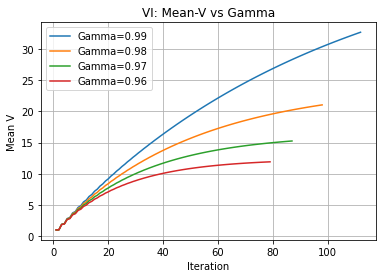

In [96]:
plt.title("VI: Mean-V vs Gamma")
plt.xlabel("Iteration")
plt.ylabel("Mean V") 

# plt.plot(df_gamma_999["iteration"], df_gamma_999["mean_v"], label="Gamma=0.999")
plt.plot(df_gamma_99["iteration"], df_gamma_99["mean_v"], label="Gamma=0.99")
plt.plot(df_gamma_98["iteration"], df_gamma_98["mean_v"], label="Gamma=0.98")
plt.plot(df_gamma_97["iteration"], df_gamma_97["mean_v"], label="Gamma=0.97")
plt.plot(df_gamma_96["iteration"], df_gamma_96["mean_v"], label="Gamma=0.96")

plt.grid()
plt.legend()
plt.savefig("images/fm/vi_100.png")
plt.show()

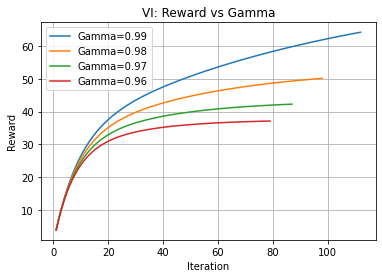

In [95]:
plt.title("VI: Reward vs Gamma")
plt.xlabel("Iteration")
plt.ylabel("Reward") 

# plt.plot(df_gamma_999["iteration"], df_gamma_999["reward"], label="Gamma=0.999")
plt.plot(df_gamma_99["iteration"], df_gamma_99["reward"], label="Gamma=0.99")
plt.plot(df_gamma_98["iteration"], df_gamma_98["reward"], label="Gamma=0.98")
plt.plot(df_gamma_97["iteration"], df_gamma_97["reward"], label="Gamma=0.97")
plt.plot(df_gamma_96["iteration"], df_gamma_96["reward"], label="Gamma=0.96")

plt.grid()
plt.legend()
plt.savefig("images/fm/vi_101.png")
plt.show()

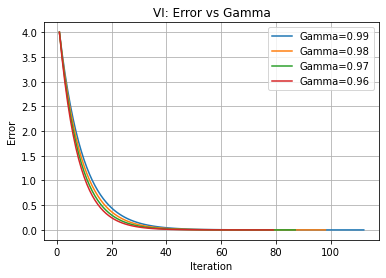

In [94]:
plt.title("VI: Error vs Gamma")
plt.xlabel("Iteration")
plt.ylabel("Error") 

# plt.plot(df_gamma_999["iteration"], df_gamma_999["error"], label="Gamma=0.999")
plt.plot(df_gamma_99["iteration"], df_gamma_99["error"], label="Gamma=0.99")
plt.plot(df_gamma_98["iteration"], df_gamma_98["error"], label="Gamma=0.98")
plt.plot(df_gamma_97["iteration"], df_gamma_97["error"], label="Gamma=0.97")
plt.plot(df_gamma_96["iteration"], df_gamma_96["error"], label="Gamma=0.96")

plt.grid()
plt.legend()
plt.savefig("images/fm/vi_102.png")
plt.show()

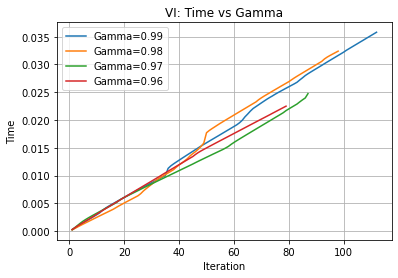

In [93]:
plt.title("VI: Time vs Gamma")
plt.xlabel("Iteration")
plt.ylabel("Time") 

# plt.plot(df_gamma_999["iteration"], df_gamma_999["time"], label="Gamma=0.999")
plt.plot(df_gamma_99["iteration"], df_gamma_99["time"], label="Gamma=0.99")
plt.plot(df_gamma_98["iteration"], df_gamma_98["time"], label="Gamma=0.98")
plt.plot(df_gamma_97["iteration"], df_gamma_97["time"], label="Gamma=0.97")
plt.plot(df_gamma_96["iteration"], df_gamma_96["time"], label="Gamma=0.96")

plt.grid()
plt.legend()
plt.savefig("images/fm/vi_103.png")
plt.show()

In [77]:
vi_epsilon_1    = run_vi(P=P, R=R, gamma=0.99, epsilon=0.1, max_iter=1000)
vi_epsilon_01   = run_vi(P=P, R=R, gamma=0.99, epsilon=0.01, max_iter=1000)
vi_epsilon_001  = run_vi(P=P, R=R, gamma=0.99, epsilon=0.001, max_iter=1000)

In [78]:
df_epsilon_1    = get_stats(vi_epsilon_1)
df_epsilon_01   = get_stats(vi_epsilon_01)
df_epsilon_001  = get_stats(vi_epsilon_001)

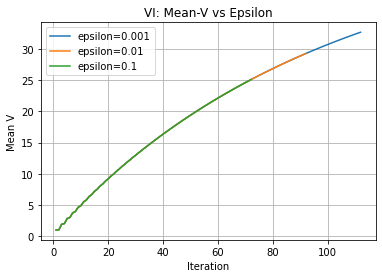

In [79]:
plt.title("VI: Mean-V vs Epsilon")
plt.xlabel("Iteration")
plt.ylabel("Mean V") 


plt.plot(df_epsilon_001["iteration"], df_epsilon_001["mean_v"], label="epsilon=0.001")
plt.plot(df_epsilon_01["iteration"], df_epsilon_01["mean_v"], label="epsilon=0.01")
plt.plot(df_epsilon_1["iteration"], df_epsilon_1["mean_v"], label="epsilon=0.1")


plt.grid()
plt.legend()
plt.savefig("images/fm/vi_110.png")
plt.show()

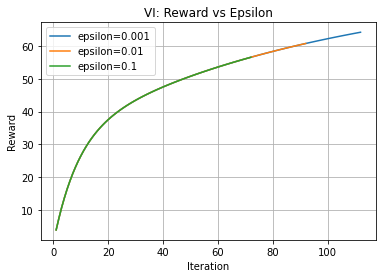

In [80]:
plt.title("VI: Reward vs Epsilon")
plt.xlabel("Iteration")
plt.ylabel("Reward") 


plt.plot(df_epsilon_001["iteration"], df_epsilon_001["reward"], label="epsilon=0.001")
plt.plot(df_epsilon_01["iteration"], df_epsilon_01["reward"], label="epsilon=0.01")
plt.plot(df_epsilon_1["iteration"], df_epsilon_1["reward"], label="epsilon=0.1")


plt.grid()
plt.legend()
plt.savefig("images/fm/vi_111.png")
plt.show()

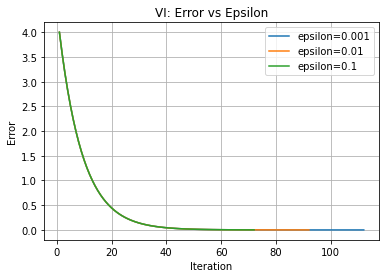

In [81]:
plt.title("VI: Error vs Epsilon")
plt.xlabel("Iteration")
plt.ylabel("Error") 


plt.plot(df_epsilon_001["iteration"], df_epsilon_001["error"], label="epsilon=0.001")
plt.plot(df_epsilon_01["iteration"], df_epsilon_01["error"], label="epsilon=0.01")
plt.plot(df_epsilon_1["iteration"], df_epsilon_1["error"], label="epsilon=0.1")


plt.grid()
plt.legend()
plt.savefig("images/fm/vi_112.png")
plt.show()

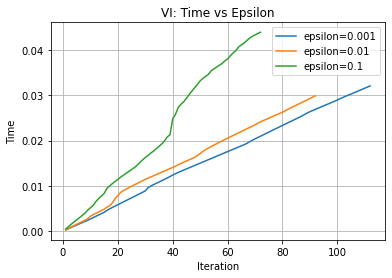

In [82]:
plt.title("VI: Time vs Epsilon")
plt.xlabel("Iteration")
plt.ylabel("Time") 


plt.plot(df_epsilon_001["iteration"], df_epsilon_001["time"], label="epsilon=0.001")
plt.plot(df_epsilon_01["iteration"], df_epsilon_01["time"], label="epsilon=0.01")
plt.plot(df_epsilon_1["iteration"], df_epsilon_1["time"], label="epsilon=0.1")


plt.grid()
plt.legend()
plt.savefig("images/fm/vi_114.png")
plt.show()

In [205]:
vi = run_vi(P=P, R=R, gamma=0.99, epsilon=0.001, max_iter=1000, verbose=True)

Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [206]:
vi.run_stats[len(vi.run_stats)-1]

{'State': None,
 'Action': None,
 'Reward': 64.12387847688481,
 'Error': 1.0926602378447114e-05,
 'Time': 0.07620096206665039,
 'Max V': 64.12387847688481,
 'Mean V': 32.691561384027445,
 'Iteration': 112}

In [207]:
df_vi   = get_stats(vi)

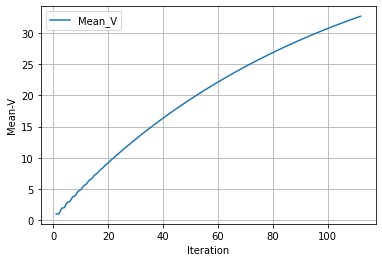

In [208]:
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_vi["iteration"], df_vi["mean_v"], label="Mean_V")


plt.grid()
plt.legend()
# plt.savefig("images/fl/q_100.png")
plt.show()

In [209]:
show_policy(vi, WAIT_REWARD, CUT_REWARD, FIRE_PROB)

Expected Reward:  934.1999999999937
['W', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'

# Policy Iteration

### Tune gamma

In [165]:
pi_gamma_99 = run_pi(P=P, R=R, gamma=0.99, epsilon=0.01, max_iter=100)
pi_gamma_98 = run_pi(P=P, R=R, gamma=0.98, epsilon=0.01, max_iter=100)
pi_gamma_97 = run_pi(P=P, R=R, gamma=0.97, epsilon=0.01, max_iter=100)
pi_gamma_96 = run_pi(P=P, R=R, gamma=0.96, epsilon=0.01, max_iter=100)

In [166]:
pi_gamma_99_df = get_stats(pi_gamma_99)
pi_gamma_98_df = get_stats(pi_gamma_98)
pi_gamma_97_df = get_stats(pi_gamma_97)
pi_gamma_96_df = get_stats(pi_gamma_96)

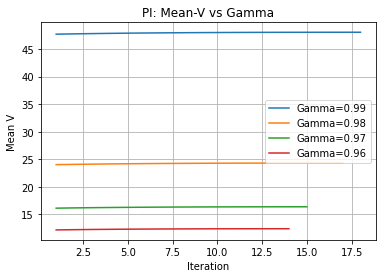

In [167]:
plt.title("PI: Mean-V vs Gamma")
plt.xlabel("Iteration")
plt.ylabel("Mean V") 

plt.plot(pi_gamma_99_df["iteration"], pi_gamma_99_df["mean_v"], label="Gamma=0.99")
plt.plot(pi_gamma_98_df["iteration"], pi_gamma_98_df["mean_v"], label="Gamma=0.98")
plt.plot(pi_gamma_97_df["iteration"], pi_gamma_97_df["mean_v"], label="Gamma=0.97")
plt.plot(pi_gamma_96_df["iteration"], pi_gamma_96_df["mean_v"], label="Gamma=0.96")

plt.grid()
plt.legend()
plt.savefig("images/fm/pi_100.png")
plt.show()

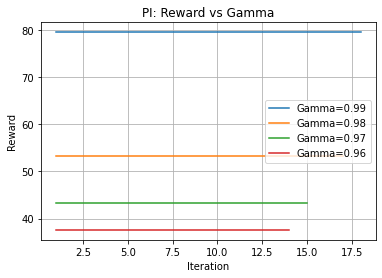

In [168]:
plt.title("PI: Reward vs Gamma")
plt.xlabel("Iteration")
plt.ylabel("Reward") 

plt.plot(pi_gamma_99_df["iteration"], pi_gamma_99_df["reward"], label="Gamma=0.99")
plt.plot(pi_gamma_98_df["iteration"], pi_gamma_98_df["reward"], label="Gamma=0.98")
plt.plot(pi_gamma_97_df["iteration"], pi_gamma_97_df["reward"], label="Gamma=0.97")
plt.plot(pi_gamma_96_df["iteration"], pi_gamma_96_df["reward"], label="Gamma=0.96")

plt.grid()
plt.legend()
plt.savefig("images/fm/pi_101.png")
plt.show()

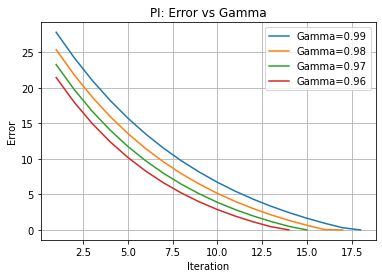

In [250]:
plt.title("PI: Error vs Gamma")
plt.xlabel("Iteration")
plt.ylabel("Error") 

plt.plot(pi_gamma_99_df["iteration"], pi_gamma_99_df["error"], label="Gamma=0.99")
plt.plot(pi_gamma_98_df["iteration"], pi_gamma_98_df["error"], label="Gamma=0.98")
plt.plot(pi_gamma_97_df["iteration"], pi_gamma_97_df["error"], label="Gamma=0.97")
plt.plot(pi_gamma_96_df["iteration"], pi_gamma_96_df["error"], label="Gamma=0.96")

plt.grid()
plt.legend()
plt.savefig("images/fm/pi_102.png")
plt.show()

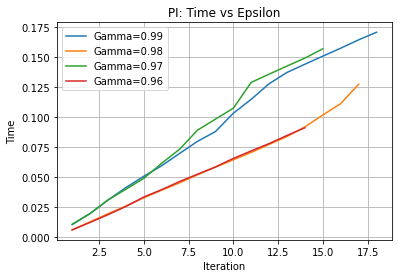

In [251]:
plt.title("PI: Time vs Epsilon")
plt.xlabel("Iteration")
plt.ylabel("Time") 


plt.plot(pi_gamma_99_df["iteration"], pi_gamma_99_df["time"], label="Gamma=0.99")
plt.plot(pi_gamma_98_df["iteration"], pi_gamma_98_df["time"], label="Gamma=0.98")
plt.plot(pi_gamma_97_df["iteration"], pi_gamma_97_df["time"], label="Gamma=0.97")
plt.plot(pi_gamma_96_df["iteration"], pi_gamma_96_df["time"], label="Gamma=0.96")


plt.grid()
plt.legend()
plt.savefig("images/fm/pi_114.png")
plt.show()

In [252]:
pi = run_pi(P=P, R=R, gamma=0.99, epsilon=0.01, max_iter=6, verbose=True)

Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [177]:
pi.run_stats[len(pi.run_stats)-1]

{'State': None,
 'Action': None,
 'Reward': 79.4924291307446,
 'Error': 13.509576867327198,
 'Time': 0.07355809211730957,
 'Max V': 79.4924291307446,
 'Mean V': 47.92391359971755,
 'Iteration': 6}

In [178]:
df_pi   = get_stats(pi)

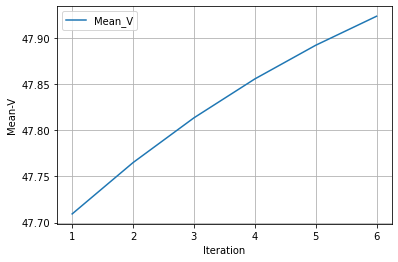

In [179]:
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_pi["iteration"], df_pi["mean_v"], label="Mean_V")


plt.grid()
plt.legend()
# plt.savefig("images/fl/q_100.png")
plt.show()

In [180]:
show_policy(pi, WAIT_REWARD, CUT_REWARD, FIRE_PROB)

Expected Reward:  912.5999999999929
['W', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'

# Q-Learning

In [163]:
import random

np.random.seed(1234)
random.seed(1234)

#### Tune Gamma

In [111]:
ql_gamma_99 = run_q(P=P, R=R, gamma=0.99, n_iter=10**5)
ql_gamma_98 = run_q(P=P, R=R, gamma=0.98, n_iter=10**5)
ql_gamma_97 = run_q(P=P, R=R, gamma=0.97, n_iter=10**5)
ql_gamma_96 = run_q(P=P, R=R, gamma=0.96, n_iter=10**5)

In [117]:
df_gamma_99 = get_stats_q(ql_gamma_99)
df_gamma_98 = get_stats_q(ql_gamma_98)
df_gamma_97 = get_stats_q(ql_gamma_97)
df_gamma_96 = get_stats_q(ql_gamma_96)

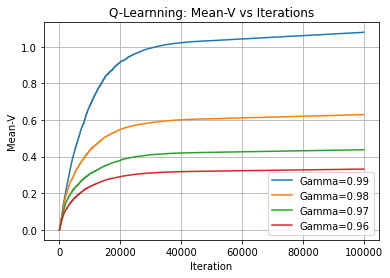

In [118]:
plt.title("Q-Learnning: Mean-V vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_gamma_99["iteration"], df_gamma_99["mean_v"], label="Gamma=0.99")
plt.plot(df_gamma_98["iteration"], df_gamma_98["mean_v"], label="Gamma=0.98")
plt.plot(df_gamma_97["iteration"], df_gamma_97["mean_v"], label="Gamma=0.97")
plt.plot(df_gamma_96["iteration"], df_gamma_96["mean_v"], label="Gamma=0.96")


plt.grid()
plt.legend()
plt.savefig("images/fm/q_100.png")
plt.show()

#### Tune Alpha

In [114]:
ql_alpha_01 = run_q(P=P, R=R, gamma=0.99, alpha=0.1, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.9999, n_iter=10**5)
ql_alpha_02 = run_q(P=P, R=R, gamma=0.99, alpha=0.2, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.9999, n_iter=10**5)
ql_alpha_03 = run_q(P=P, R=R, gamma=0.99, alpha=0.3, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.9999, n_iter=10**5)
ql_alpha_04 = run_q(P=P, R=R, gamma=0.99, alpha=0.4, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.9999, n_iter=10**5)
ql_alpha_05 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.9999, n_iter=10**5)
ql_alpha_06 = run_q(P=P, R=R, gamma=0.99, alpha=0.6, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.9999, n_iter=10**5)
ql_alpha_07 = run_q(P=P, R=R, gamma=0.99, alpha=0.7, alpha_decay=0.99999, epsilon=1.0, epsilon_decay=0.9999, n_iter=10**5)


In [115]:
df_alpha_01 = get_stats_q(ql_alpha_01)
df_alpha_02 = get_stats_q(ql_alpha_02)
df_alpha_03 = get_stats_q(ql_alpha_03)
df_alpha_04 = get_stats_q(ql_alpha_04)
df_alpha_05 = get_stats_q(ql_alpha_05)
df_alpha_06 = get_stats_q(ql_alpha_06)
df_alpha_07 = get_stats_q(ql_alpha_07)

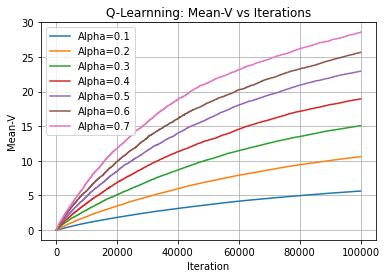

In [188]:
plt.title("Q-Learnning: Mean-V vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_alpha_01["iteration"], df_alpha_01["mean_v"], label="Alpha=0.1")
plt.plot(df_alpha_02["iteration"], df_alpha_02["mean_v"], label="Alpha=0.2")
plt.plot(df_alpha_03["iteration"], df_alpha_03["mean_v"], label="Alpha=0.3")
plt.plot(df_alpha_04["iteration"], df_alpha_04["mean_v"], label="Alpha=0.4")
plt.plot(df_alpha_05["iteration"], df_alpha_05["mean_v"], label="Alpha=0.5")
plt.plot(df_alpha_06["iteration"], df_alpha_06["mean_v"], label="Alpha=0.6")
plt.plot(df_alpha_07["iteration"], df_alpha_07["mean_v"], label="Alpha=0.7")


plt.grid()
plt.legend()
plt.savefig("images/fm/q_101.png")
plt.show()

### Tune alpha_decay

In [120]:
ql_alpha_decay_99   = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99,  n_iter=10**5)
ql_alpha_decay_999  = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.999, n_iter=10**5)
ql_alpha_decay_9999 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.9999,n_iter=10**5)
ql_alpha_decay_99999 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999,n_iter=10**5)


In [121]:
df_alpha_decay_99    = get_stats_q(ql_alpha_decay_99)
df_alpha_decay_999   = get_stats_q(ql_alpha_decay_999)
df_alpha_decay_9999  = get_stats_q(ql_alpha_decay_9999)
df_alpha_decay_99999 = get_stats_q(ql_alpha_decay_99999)

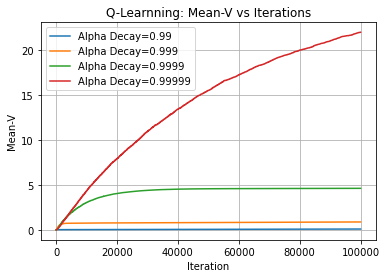

In [122]:
plt.title("Q-Learnning: Mean-V vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_alpha_decay_99["iteration"],    df_alpha_decay_99["mean_v"],    label="Alpha Decay=0.99")
plt.plot(df_alpha_decay_999["iteration"],   df_alpha_decay_999["mean_v"],   label="Alpha Decay=0.999")
plt.plot(df_alpha_decay_9999["iteration"],  df_alpha_decay_9999["mean_v"],  label="Alpha Decay=0.9999")
plt.plot(df_alpha_decay_99999["iteration"], df_alpha_decay_99999["mean_v"], label="Alpha Decay=0.99999")


plt.grid()
plt.legend()
plt.savefig("images/fm/q_102.png")
plt.show()

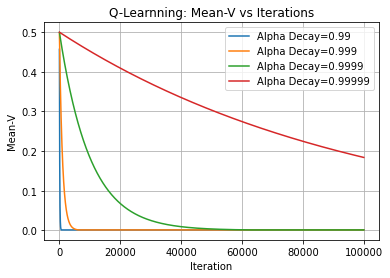

In [123]:
plt.title("Q-Learnning: Mean-V vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_alpha_decay_99["iteration"], df_alpha_decay_99["alpha"], label="Alpha Decay=0.99")
plt.plot(df_alpha_decay_999["iteration"], df_alpha_decay_999["alpha"], label="Alpha Decay=0.999")
plt.plot(df_alpha_decay_9999["iteration"], df_alpha_decay_9999["alpha"], label="Alpha Decay=0.9999")
plt.plot(df_alpha_decay_99999["iteration"], df_alpha_decay_99999["alpha"], label="Alpha Decay=0.99999")


plt.grid()
plt.legend()
plt.savefig("images/fm/q_104.png")
plt.show()

### Tune Epsolon

In [211]:
ql_epsilon_001 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=0.01, n_iter=10**5)
ql_epsilon_01 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=0.2, n_iter=10**5)
ql_epsilon_05 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=0.5, n_iter=10**5)
ql_epsilon_10 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=1.0, n_iter=10**5)


In [212]:
df_epsilon_001 = get_stats_q(ql_epsilon_001)
df_epsilon_01 = get_stats_q(ql_epsilon_01)
df_epsilon_05 = get_stats_q(ql_epsilon_05)
df_epsilon_10 = get_stats_q(ql_epsilon_10)

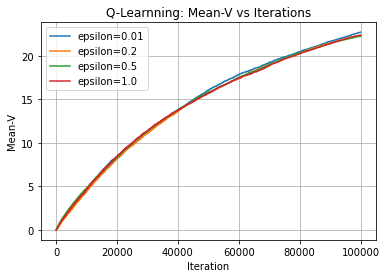

In [213]:
plt.title("Q-Learnning: Mean-V vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_epsilon_001["iteration"], df_epsilon_001["mean_v"], label="epsilon=0.01")
plt.plot(df_epsilon_01["iteration"], df_epsilon_01["mean_v"], label="epsilon=0.2")
plt.plot(df_epsilon_05["iteration"], df_epsilon_05["mean_v"], label="epsilon=0.5")
plt.plot(df_epsilon_10["iteration"], df_epsilon_10["mean_v"], label="epsilon=1.0")


plt.grid()
plt.legend()
plt.savefig("images/fm/q_105.png")
plt.show()

### Tune epsilon_decay

In [129]:
ql_epsilon_decay_99   = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=0.5, epsilon_decay=0.99, n_iter=10**5)
ql_epsilon_decay_999  = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=0.5, epsilon_decay=0.999, n_iter=10**5)
ql_epsilon_decay_9999 = run_q(P=P, R=R, gamma=0.99, alpha=0.5, alpha_decay=0.99999, epsilon=0.5, epsilon_decay=0.9999, n_iter=10**5)

In [130]:
df_epsilon_decay_99   = get_stats_q(ql_epsilon_decay_99)
df_epsilon_decay_999  = get_stats_q(ql_epsilon_decay_999)
df_epsilon_decay_9999 = get_stats_q(ql_epsilon_decay_9999)

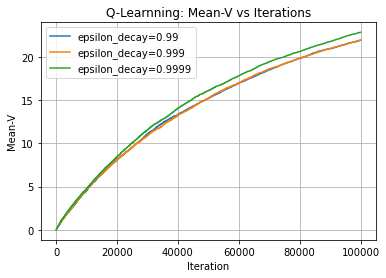

In [131]:
plt.title("Q-Learnning: Mean-V vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_epsilon_decay_99["iteration"], df_epsilon_decay_99["mean_v"], label="epsilon_decay=0.99")
plt.plot(df_epsilon_decay_999["iteration"], df_epsilon_decay_999["mean_v"], label="epsilon_decay=0.999")
plt.plot(df_epsilon_decay_9999["iteration"], df_epsilon_decay_9999["mean_v"], label="epsilon_decay=0.9999")


plt.grid()
plt.legend()
plt.savefig("images/fm/q_106.png")
plt.show()

In [253]:
ql = run_q(P=P, R=R, gamma=0.99, alpha=1, alpha_decay=0.99999, epsilon=0.01, epsilon_decay=0.99999, n_iter=10*10**6, verbose=True)


Policy:  (0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 

In [254]:
# ql.run_stats[len(ql.run_stats)-1]

In [255]:
ql.run_stats[len(ql.run_stats)-1]

{'State': 49,
 'Action': 0,
 'Reward': 0.0,
 'Error': 8.965452666051021e-05,
 'Time': 939.6248199939728,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.99,
 'Max V': 73.15727849118437,
 'Mean V': 41.91824394140059,
 'Iteration': 10000000}

In [256]:
df_ql   = get_stats(ql)

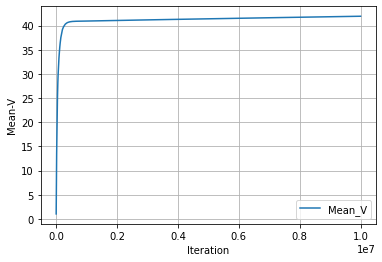

In [257]:
plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_ql["iteration"], df_ql["mean_v"], label="Mean_V")


plt.grid()
plt.legend()
# plt.savefig("images/fl/q_100.png")
plt.show()

In [258]:
show_policy(ql, WAIT_REWARD, CUT_REWARD, FIRE_PROB)

Expected Reward:  1594.7999999999881
['W', 'C', 'C', 'C', 'W', 'W', 'W', 'W', 'W', 'C', 'C', 'W', 'W', 'C', 'W', 'W', 'C', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'C', 'C', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'C', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'C', 'W', 'C', 'C', 'C', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'C', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'C', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'W', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'C', 'C', 'W

# Small Problem

In [233]:
NUM_STATES_SM=20
WAIT_REWARD_SM=4
CUT_REWARD_SM=2
FIRE_PROB_SM=0.2

P_sm, R_sm = get_forest(num_states=NUM_STATES_SM, wait_reward=WAIT_REWARD_SM, cut_reward=CUT_REWARD_SM, fire_prob=FIRE_PROB_SM)

In [234]:
vi_sm = run_vi(P=P_sm, R=R_sm, gamma=0.99, epsilon=0.001, max_iter=1000, verbose=True)

Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Iterations:  56
CPU time:  0.009166240692138672
Error mean:  [0.34340586156212344]
Wallclock time : 0.00920414924621582
------------------------------------------------------------------


In [235]:
vi_sm.run_stats[len(vi_sm.run_stats)-1]

{'State': None,
 'Action': None,
 'Reward': 35.98672458006111,
 'Error': 1.0763288443627061e-05,
 'Time': 0.009115219116210938,
 'Max V': 35.98672458006111,
 'Mean V': 22.259629135724403,
 'Iteration': 56}

In [259]:
show_policy(vi_sm, WAIT_REWARD_SM, CUT_REWARD_SM, FIRE_PROB_SM)

Expected Reward:  48.00000000000001
['W', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [265]:
vi_sm.run_stats[len(vi_sm.run_stats)-1]

{'State': None,
 'Action': None,
 'Reward': 35.98672458006111,
 'Error': 1.0763288443627061e-05,
 'Time': 0.009115219116210938,
 'Max V': 35.98672458006111,
 'Mean V': 22.259629135724403,
 'Iteration': 56}

In [237]:
pi_sm = run_pi(P=P_sm, R=R_sm, gamma=0.99, epsilon=0.01, max_iter=10, verbose=True)

Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Iterations:  9
CPU time:  0.006208896636962891
Wallclock time : 0.006301164627075195
------------------------------------------------------------------


In [260]:
show_policy(pi_sm, WAIT_REWARD_SM, CUT_REWARD_SM, FIRE_PROB_SM)

Expected Reward:  48.00000000000001
['W', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [262]:
pi_sm.run_stats[8]

{'State': None,
 'Action': None,
 'Reward': 61.30236950549434,
 'Error': 1.4210854715202004e-14,
 'Time': 0.006151914596557617,
 'Max V': 61.30236950549434,
 'Mean V': 47.575254605529686,
 'Iteration': 9}

In [246]:
ql_sm = run_q(P=P_sm, R=R_sm, gamma=0.99, alpha=1, alpha_decay=0.99999, epsilon=0.01, epsilon_decay=0.99999, n_iter=5*10**5, verbose=True)


Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
CPU time:  28.158453941345215
Wallclock time : 28.15846586227417
------------------------------------------------------------------


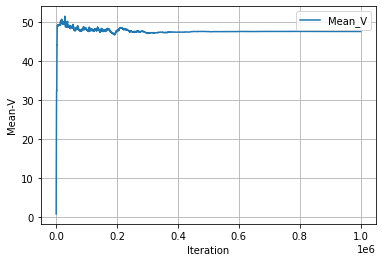

In [240]:
ql_sm.run_stats[len(ql_sm.run_stats)-1]
df_ql_sm   = get_stats(ql_sm)


plt.xlabel("Iteration")
plt.ylabel("Mean-V") 


plt.plot(df_ql_sm["iteration"], df_ql_sm["mean_v"], label="Mean_V")


plt.grid()
plt.legend()
# plt.savefig("images/fl/q_100.png")
plt.show()

In [248]:
ql_sm = run_q(P=P_sm, R=R_sm, gamma=0.99, alpha=1, alpha_decay=0.99999, epsilon=0.01, epsilon_decay=0.99999, n_iter=0.8*10**6, verbose=True)


Policy:  (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
CPU time:  67.47302007675171
Wallclock time : 67.47302889823914
------------------------------------------------------------------


In [264]:
ql_sm.run_stats[len(ql_sm.run_stats)-1]

{'State': 10,
 'Action': 1,
 'Reward': 1.0,
 'Error': 6.711373280661093e-05,
 'Time': 67.47263717651367,
 'Alpha': 0.001,
 'Epsilon': 0.1,
 'Gamma': 0.99,
 'Max V': 60.51730687884941,
 'Mean V': 47.605780666508245,
 'Iteration': 800000}

In [266]:
show_policy(ql_sm, WAIT_REWARD_SM, CUT_REWARD_SM, FIRE_PROB_SM)

Expected Reward:  48.00000000000001
['W', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']
